In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('seaborn')
sns.set(font_scale=2)

In [2]:
sensor_df = pd.read_csv('./data/sensor.raw', names=('date', 'indicator'), parse_dates = ['date'])
cont_df = pd.read_csv('./data/cont.raw', names=('indicator', 'counter_', 'date'), parse_dates = ['date'])

In [3]:
reg_expr = r'\d+'
reg_expr_compiled = re.compile(reg_expr)
sensor_df['indicator'] = sensor_df.indicator.apply(lambda x: re.findall(reg_expr_compiled, x)[0])

sensor_df.indicator = pd.to_numeric(sensor_df.indicator)
MIN_DATE = min(sensor_df.date.min(), cont_df.date.min()).replace(hour=0, minute=0, second=0, microsecond=0)

In [4]:
counter_df = pd.DataFrame()
counter_df[['indicator', 'date']] = cont_df[['counter_', 'date']].copy()

sensor_df['Датчик'] = 'sensor'
cont_df['Датчик'] = 'cont'
counter_df['Датчик'] = 'счетчик остановок'

In [5]:
df = pd.concat([sensor_df, cont_df[['indicator', 'date', 'Датчик']], counter_df], axis=0)
df = df.reset_index()
df['hours_'] = (df.date - MIN_DATE).dt.seconds / 3600

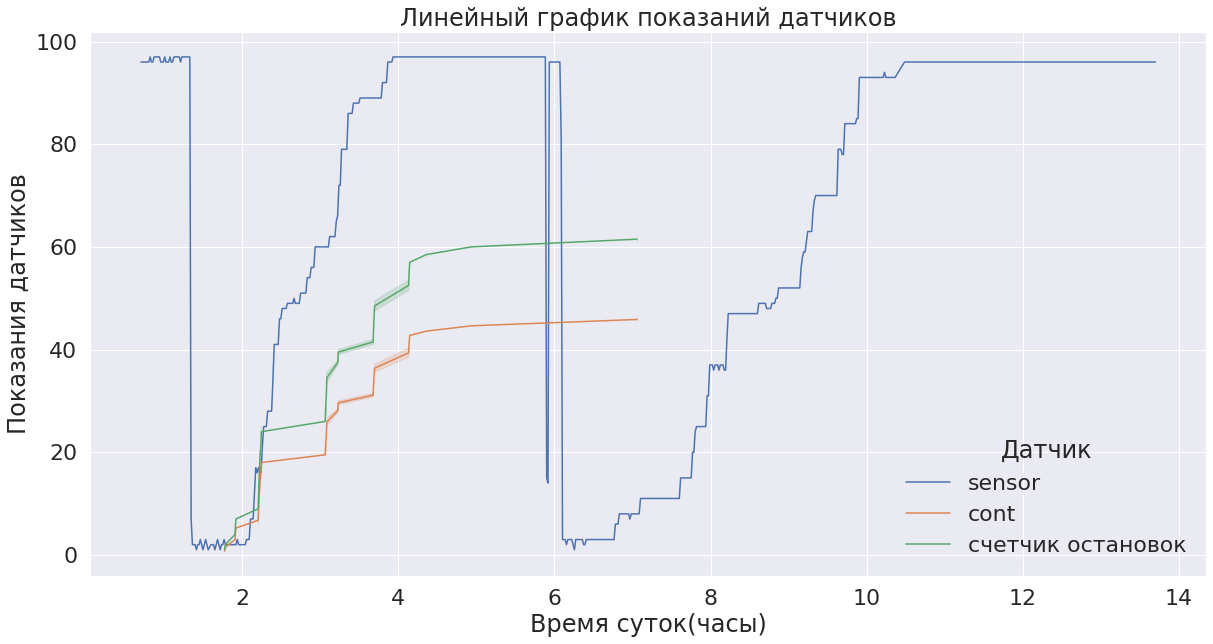

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(data=df, x='hours_', y='indicator', hue='Датчик')
ax.set_title('Линейный график показаний датчиков')
ax.set_ylabel('Показания датчиков')
ax.set_xlabel('Время суток(часы)')
plt.savefig('./data/linear.png')
plt.show()

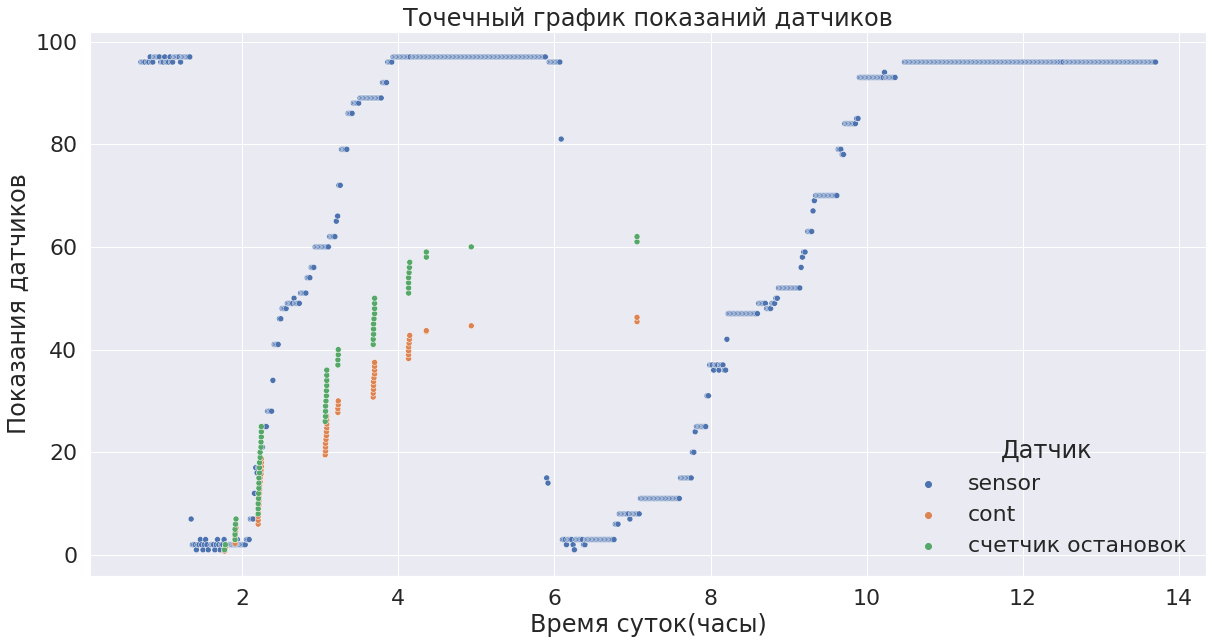

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x=df.hours_, y=df.indicator, hue=df['Датчик'])
ax.set_title('Точечный график показаний датчиков')
ax.set_ylabel('Показания датчиков')
ax.set_xlabel('Время суток(часы)')
plt.savefig('./data/scatter.png')
plt.show()

In [8]:
# df.to_excel('output.xlsx')

In [9]:
#sensor33_df['hours_'] = (sensor33_df.date - MIN_DATE).dt.seconds / 3600
#cont33_df['hours_'] = (cont33_df.date - MIN_DATE).dt.seconds / 3600

#sensor33_df.to_excel('sensor33.xlsx')
#cont33_df.to_excel('cont33.xlsx')